<a href="https://colab.research.google.com/github/benafshapostwala/Vehicle-Profile-using-Image-Processing-and-Deep-Learning/blob/main/Consolidated_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2.0


In [ ]:
!pip install colorthief

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
input_image = '/content/gdrive/My Drive/dataset/data/dataset/img_path/IMG_20200217_141307.jpg'

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr  2 20:53:22 2020

@author: Benafsha
"""
#import webcolors
import colorsys
import cv2
import numpy as np
import PIL
from PIL import Image

from colorthief import ColorThief
#img='/content/gdrive/My Drive/dataset/data/dataset/img_path/IMG_20200217_141344.jpg'
i=cv2.imread(input_image)
image=cv2.resize(i,(224,224))

color_thief = ColorThief(input_image)
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
print(dominant_color)
l=list(dominant_color)
palette = color_thief.get_palette(color_count=6)
r=l[0]
g=l[1]
b=l[2]
hsv = cv2.cvtColor(np.uint8([[[r,g,b]]]), cv2.COLOR_RGB2HSV)
#list(hsv)
hsv_f=np.array([hsv* [2 ,1/2.55 ,1/2.55]])
list(hsv_f)

#hsv=colorsys.rgb_to_hsv(r,g,b)
print(hsv_f)
hsv_f=list(hsv_f[0][0][0])


lower_red1 = np.array([0,26,35])
upper_red1 = np.array([15,255,255])
lower_red2 = np.array([341,11,35])
upper_red2 = np.array([360,255,255])

lower_orange = np.array([16,26,35])
upper_orange = np.array([40,255,255])

lower_yellow = np.array([41,26,35])
upper_yellow = np.array([65,255,255])

lower_green = np.array([66,26,35])
upper_green = np.array([160,255,255])

lower_blue = np.array([161,26,35])
upper_blue = np.array([255,255,255])

lower_purple = np.array([256,26,35])
upper_purple = np.array([340,255,255])

lower_white = np.array([0,0,55])
upper_white = np.array([360,25,255])

lower_grey = np.array([0,0,26])
upper_grey = np.array([0,0,99])

lower_black = np.array([0,0,0])
upper_black = np.array([360,255,35])





if hsv_f[0] >= lower_blue[0] and hsv_f[1] >= lower_blue[1] and hsv_f[2] >= lower_blue[2] and hsv_f[0]<= upper_blue[0] and hsv_f[1]<= upper_blue[1] and hsv_f[2]<= upper_blue[2]:
    colour="blue"
elif hsv_f[0] >= lower_red1[0] and hsv_f[1] >= lower_red1[1] and hsv_f[2] >= lower_red1[2] and hsv_f[0]<= upper_red1[0] and hsv_f[1]<= upper_red1[1] and hsv_f[2]<= upper_red1[2]:
    colour="red"
elif hsv_f[0] >= lower_red2[0] and hsv_f[1] >= lower_red2[1] and hsv_f[2] >= lower_red2[2] and hsv_f[0]<= upper_red2[0] and hsv_f[1]<= upper_red2[1] and hsv_f[2]<= upper_red2[2]:
    colour="red"
elif hsv_f[0] >= lower_orange[0] and hsv_f[1] >= lower_orange[1] and hsv_f[2] >= lower_orange[2] and hsv_f[0]<= upper_orange[0] and hsv_f[1]<= upper_orange[1] and hsv_f[2]<= upper_orange[2]:
    colour="orange"
elif hsv_f[0] >= lower_yellow[0] and hsv_f[1] >= lower_yellow[1] and hsv_f[2] >= lower_yellow[2] and hsv_f[0]<= upper_yellow[0] and hsv_f[1]<= upper_yellow[1] and hsv_f[2]<= upper_yellow[2]:
    colour="yellow"
elif hsv_f[0] >= lower_green[0] and hsv_f[1] >= lower_green[1] and hsv_f[2] >= lower_green[2] and hsv_f[0]<= upper_green[0] and hsv_f[1]<= upper_green[1] and hsv_f[2]<= upper_green[2]:
    colour="green"
elif hsv_f[0] >= lower_purple[0] and hsv_f[1] >= lower_purple[1] and hsv_f[2] >= lower_purple[2] and hsv_f[0]<= upper_purple[0] and hsv_f[1]<= upper_purple[1] and hsv_f[2]<= upper_purple[2]:
    colour="purple/magenta"
elif hsv_f[0] >= lower_white[0] and hsv_f[1] >= lower_white[1] and hsv_f[2] >= lower_white[2] and hsv_f[0]<= upper_white[0] and hsv_f[1]<= upper_white[1] and hsv_f[2]<= upper_white[2]:
    colour="white"
elif hsv_f[0] >= lower_grey[0] and hsv_f[1] >= lower_grey[1] and hsv_f[2] >= lower_grey[2] and hsv_f[0]<= upper_grey[0] and hsv_f[1]<= upper_grey[1] and hsv_f[2]<= upper_grey[2]:
    colour="grey"
elif hsv_f[0] >= lower_black[0] and hsv_f[1] >= lower_black[1] and hsv_f[2] >= lower_black[2] and hsv_f[0]<= upper_black[0] and hsv_f[1]<= upper_black[1] and hsv_f[2]<= upper_black[2]:
    colour="black"

else:
    colour="na"
    
print(colour)


(123, 90, 84)
[[[[10.         31.76470588 48.23529412]]]]
red


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  5 16:59:53 2020

@author: Benafsha
"""
'''import plaidml.keras
plaidml.keras.install_backend()'''

###################################################### MAIN CODE ##################################################


import keras
import glob
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
import csv
import xml.etree.cElementTree as ET
from imgaug.augmentables.bbs import BoundingBoxesOnImage
from imgaug import augmenters as iaa
import os
import shutil
import random
#from imageai.Detection.Custom import DetectionModelTrainer
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical, np_utils
from keras.preprocessing import image
from keras.preprocessing import image
from PIL import Image
tf.to_float = lambda x: tf.cast(x, tf.float32)
import cv2
from sklearn.model_selection import train_test_split
import torch
from sklearn.utils import shuffle
from keras import models
from keras import layers
from keras import regularizers
from keras.regularizers import l1

AUTOTUNE = tf.data.experimental.AUTOTUNE

csv_path="/content/gdrive/My Drive/dataset/data/dataset"
#resized_images_path='/content/gdrive/My Drive/dataset/data/dataset/img_path'
path="/content/gdrive/My Drive/dataset/data/dataset/labels"
folder="/content/gdrive/My Drive/dataset/data/dataset"
#xml_to_csv(labels_path)
a=cv2.imread("/content/gdrive/My Drive/dataset/data/dataset/img_path")


'''
src_dir = "/content/gdrive/My Drive/dataset/data/dataset/img_path/"
#dst_dir = "your/destination/dir"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    ti=cv2.imread(jpgfile)
    


X=ti
X = X.reshape((X.shape[:2]*1,3))
#X = data3.reshape((data3.shape[0]*3, 1000,3))
X = X.transpose()
print(X.shape)
'''




train_image = []
src_dir = "/content/gdrive/My Drive/dataset/data/dataset/img_path/"
#dst_dir = "your/destination/dir"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    ti=Image.open(jpgfile)
    ti.load()
    img_resized = ti.resize((224,224))
    data = np.asarray(img_resized, dtype="int32")
    train_image.append(data)
#print(data.shape)
#print(train_image.shape)
X=np.array(train_image)


print(X[0].shape,"shape")
'''for u in X:
  print(u)
X=np.array(u)
print("shape is",X.shape)

data3 = np.arange(27000000).reshape(3000, 9000 )
print(data3.shape)

X = data3.reshape((data3.shape[0]*3, 1000,3))
#X.reshape(59, 1600, 1200, 3)
#X = X.reshape(X.shape[:2])
'''


'''
img = image.img_to_array(list_ti)
#img = img/255
train_image.append(img)
X = np.array(train_image)
X = X.reshape(X.shape[1:])
X = X.transpose()'''


#list_ds = tf.data.Dataset.list_files('/content/gdrive/My Drive/dataset/data/dataset/img_path/*.jpg')


  
def get_label(path):
  # convert the path to a list of path components
  parts = tf.strings.split(path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == 'car','bike'
get_label(path)
'''
y=train['label'].values
y = to_categorical(y)
'''
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [224, 224])

def process_path(path):
  label = get_label(path)
  # load the raw data from the file as a string
  img = tf.io.read_file(path)
  img = decode_img(img)
  return img, label
#labeled_ds = list_ti.map(process_path, num_parallel_calls=AUTOTUNE)



xml_list = []
for xml_file in glob.glob(path + '/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
        value = (root.find('filename').text,
                int(root.find('size')[0].text),
                int(root.find('size')[1].text),
                member[0].text,
                int(member[4][0].text),
                int(member[4][1].text),
                int(member[4][2].text),
                int(member[4][3].text)
                )
        xml_list.append(value)
column_name = ['filename', 'width', 'height',
            'class', 'xmin', 'ymin', 'xmax', 'ymax']
xml_df = pd.DataFrame(xml_list, columns=column_name)

#print(xml_df)
#return xml_df
#training_set = pd.read_csv(xml_df)

training_set=xml_df[['filename','class']] 
#print(training_set)
training_img =list(training_set['filename'])
training_img  =list(["{}.jpg".format(x) for x in training_set[:-1]]).pop()
#print(training_img)
training_labels_1 = list(training_set['class'])
training_set = pd.DataFrame( {'Images': training_img,'types': training_labels_1})
#print(training_set)
training_set['Images'] = xml_df.filename.map(lambda filename: f'/content/gdrive/My Drive/dataset/data/dataset/img_path/{training_img}.jpg')
#print(training_set)
training_img =training_set[['Images']]
#print(training_img)
training_labels_1=training_set[['types']]
list(training_labels_1)
#print(training_labels_1)
#images = [cv2.imread(file) for file in glob.glob("C:\\Users\\Benafsha\\Desktop\\dataset\\img_path")]
#return training_imgs,training_labels_1 

y=training_labels_1['types'].values
y = np_utils.to_categorical(training_labels_1.types.factorize()[0])
print(y.shape)


'''x = training_labels_1.type.values.categories
di = dict(zip(x,np.arange(len(x))))'''


#np_utils.to_categorical(data.types.factorize()[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape)
print(y_train.shape)

keras.layers.ZeroPadding2D(padding=(1, 1), data_format=None)

X_train, y_train = shuffle(X_train, y_train)

def create_model():
  model = Sequential() 

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
  #model.add(Dense(2, activation='softmax'))
  #model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(224,224,3)))
  #model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  #model.add(layers.Dense(2, activation='softmax'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.2))
  #model.add(Conv2D(64, (5, 5), activation='relu'))
  #model.add(MaxPooling2D(pool_size=(2, 2)))
  #model.add(layers.Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  #model.add(layers.Dropout(0.5))
  model.add(Dense(2, activation='softmax')) 
 
  model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])


  return model

model = create_model()

# Display the model's architecture
model.summary()

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = "/content/gdrive/My Drive/"
checkpoint_dir = os.path.dirname("/content/gdrive/My Drive/")

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(X_train, 
          y_train,  
          epochs=10,
          validation_data=(X_test,y_test))

#hist = model.fit(X_train, y_train, 
           # batch_size= None, epochs=10, validation_split=0.3 )

model.save('veh_type.h5') 

from keras.callbacks import *
filepath="/content/gdrive/MyDrive/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.fit(X_train, 
          y_train,  
          epochs=10,
          validation_data=(X_test,y_test),
                    )
# Create a basic model instance
model = create_model()

# Evaluate the model
loss1, acc1 = model.evaluate(X_train,  y_train, verbose=2)
loss, acc = model.evaluate(X_test,  y_test, verbose=2)
print("trained model, accuracy: {:5.2f}%".format(100*acc1))
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))



Using TensorFlow backend.


(224, 224, 3) shape
(126, 2)
(100, 224, 224, 3)
(100, 2)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 394272)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               50466944  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 50,468,098
Trainable params: 50,468,098
Non-train

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


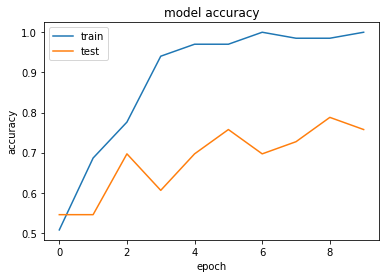

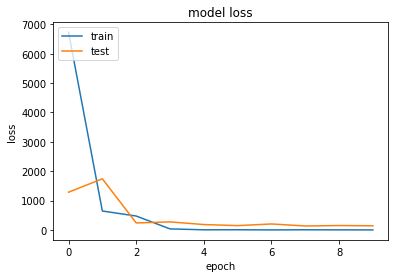

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=10, batch_size=10, verbose=0)
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("veh_type.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model


# load model
model = load_model('veh_type.h5')
# summarize model.
model.summary()
'''# load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))'''

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 394272)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               50466944  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 50,468,098
Trainable params: 50,468,098
Non-trainable params: 0
__________________________________________

'# load dataset\ndataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")\n# split into input (X) and output (Y) variables\nX = dataset[:,0:8]\nY = dataset[:,8]\n# evaluate the model\nscore = model.evaluate(X, Y, verbose=0)\nprint("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))'

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
# load the image
#path="/content/gdrive/My Drive/dataset/data/dataset/test/images/carback.jpg"
#path="/content/gdrive/My Drive/dataset/data/dataset/img_path/IMG_20200218_151646.jpg"
image = cv2.imread(input_image)
orig = image.copy()
# pre-process the image for classification
image = cv2.resize(image, (224, 224))
image = image.astype("float") / 255.0
image = np.asarray(image, dtype="int32")
image = np.expand_dims(image, axis=0)

model = load_model('veh_type.h5')
# classify the input image
(car,bike) = model.predict(image)[0]


from google.colab.patches import cv2_imshow
import imutils
# build the label
label1 = "car" if bike > car else "bike"
proba = car if car > bike else bike
label1 = "{}: {:.2f}%".format(label1, proba * 100)
# draw the label on the image
output = imutils.resize(orig, width=400)
cv2.putText(output, label1, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
	0.7, (0, 255, 0), 2)
# show the output image
'''
cv2.imshow("Output", output)
cv2.waitKey(0)'''
print(label1)
print(car,bike)

car: 95.85%
0.041498676 0.95850134


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  5 16:59:53 2020

@author: Benafsha
"""
'''import plaidml.keras
plaidml.keras.install_backend()'''

###################################################### MAIN CODE ##################################################


import keras
import glob
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
import csv
import xml.etree.cElementTree as ET
from imgaug.augmentables.bbs import BoundingBoxesOnImage
from imgaug import augmenters as iaa
import os
import shutil
import random
#from imageai.Detection.Custom import DetectionModelTrainer
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical, np_utils
from keras.preprocessing import image
from keras.preprocessing import image
from PIL import Image
tf.to_float = lambda x: tf.cast(x, tf.float32)
import cv2
from sklearn.model_selection import train_test_split
import torch
from sklearn.utils import shuffle
from keras import models
from keras import layers
from keras import regularizers
from keras.regularizers import l1



AUTOTUNE = tf.data.experimental.AUTOTUNE

csv_path="/content/gdrive/My Drive/dataset/data/dataset"
#resized_images_path='/content/gdrive/My Drive/dataset/data/dataset/img_path'
path="/content/gdrive/My Drive/Vehicle_manufacturer/cars/labels"
folder="/content/gdrive/My Drive/dataset/data/dataset"
#xml_to_csv(labels_path)
a=cv2.imread("/content/gdrive/My Drive/dataset/data/dataset/img_path")


'''
src_dir = "/content/gdrive/My Drive/dataset/data/dataset/img_path/"
#dst_dir = "your/destination/dir"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    ti=cv2.imread(jpgfile)
    


X=ti
X = X.reshape((X.shape[:2]*1,3))
#X = data3.reshape((data3.shape[0]*3, 1000,3))
X = X.transpose()
print(X.shape)
'''




train_image = []
src_dir = "/content/gdrive/My Drive/Vehicle_manufacturer/cars/images/"
#dst_dir = "your/destination/dir"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    ti=Image.open(jpgfile)
    ti.load()
    img_resized = ti.resize((224,224))
    data = np.asarray(img_resized, dtype="int32")
    train_image.append(data)
#print(data.shape)
#print(train_image.shape)
X=np.array(train_image)


print(X[0].shape,"shape")
'''for u in X:
  print(u)
X=np.array(u)
print("shape is",X.shape)

data3 = np.arange(27000000).reshape(3000, 9000 )
print(data3.shape)

X = data3.reshape((data3.shape[0]*3, 1000,3))
#X.reshape(59, 1600, 1200, 3)
#X = X.reshape(X.shape[:2])
'''


'''
img = image.img_to_array(list_ti)
#img = img/255
train_image.append(img)
X = np.array(train_image)
X = X.reshape(X.shape[1:])
X = X.transpose()'''


#list_ds = tf.data.Dataset.list_files('/content/gdrive/My Drive/dataset/data/dataset/img_path/*.jpg')


  
def get_label(path):
  # convert the path to a list of path components
  parts = tf.strings.split(path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == 'Hyundai','Tata','Maruti Suzuki','Honda','Mahindra','Chevrolet','Skoda','Volkswagen','Nissan','Renault','Ford','Fiat'
get_label(path)
'''
y=train['label'].values
y = to_categorical(y)
'''
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [224, 224])

def process_path(path):
  label = get_label(path)
  # load the raw data from the file as a string
  img = tf.io.read_file(path)
  img = decode_img(img)
  return img, label
#labeled_ds = list_ti.map(process_path, num_parallel_calls=AUTOTUNE)



xml_list = []
for xml_file in glob.glob(path + '/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
        value = (root.find('filename').text,
                int(root.find('size')[0].text),
                int(root.find('size')[1].text),
                member[0].text,
                int(member[4][0].text),
                int(member[4][1].text),
                int(member[4][2].text),
                int(member[4][3].text)
                )
        xml_list.append(value)
column_name = ['filename', 'width', 'height',
            'class', 'xmin', 'ymin', 'xmax', 'ymax']
xml_df = pd.DataFrame(xml_list, columns=column_name)

#print(xml_df)
#return xml_df
#training_set = pd.read_csv(xml_df)

training_set=xml_df[['filename','class']] 
#print(training_set)
training_img =list(training_set['filename'])
training_img  =list(["{}.jpg".format(x) for x in training_set[:-1]]).pop()
#print(training_img)
training_labels_1 = list(training_set['class'])
training_set = pd.DataFrame( {'Images': training_img,'types': training_labels_1})
#print(training_set)
training_set['Images'] = xml_df.filename.map(lambda filename: f'/content/gdrive/My Drive/dataset/data/dataset/img_path/{training_img}.jpg')
#print(training_set)
training_img =training_set[['Images']]
#print(training_img)
training_labels_1=training_set[['types']]
list(training_labels_1)
#print(training_labels_1)
#images = [cv2.imread(file) for file in glob.glob("C:\\Users\\Benafsha\\Desktop\\dataset\\img_path")]
#return training_imgs,training_labels_1 

y=training_labels_1['types'].values
y = np_utils.to_categorical(training_labels_1.types.factorize()[0])
print(y.shape)


'''x = training_labels_1.type.values.categories
di = dict(zip(x,np.arange(len(x))))'''


#np_utils.to_categorical(data.types.factorize()[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape)
print(y_train.shape)

keras.layers.ZeroPadding2D(padding=(1, 1), data_format=None)

def create_model():
  model1 = Sequential() 

  model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(224,224,3)))
  #model.add(Dense(2, activation='softmax'))
  model1.add(MaxPooling2D(pool_size=(2, 2)))
  model1.add(Conv2D(64, (5, 5), activation='relu'))
  model1.add(MaxPooling2D(pool_size=(2, 2)))
  model1.add(layers.Dropout(0.2))
  model1.add(Flatten())
  model1.add(Dense(64, activation='relu'))
  model1.add(Dense(12, activation='softmax')) 
  model1.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])
  return model1

model1 = create_model()

# Display the model's architecture
model1.summary()

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = "/content/gdrive/My Drive/"
checkpoint_dir = os.path.dirname("/content/gdrive/My Drive/")

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model1.fit(X_train, 
          y_train,  
          epochs=20,
          validation_data=(X_test,y_test))

hist = model1.fit(X_train, y_train, 
            batch_size= None, epochs=10, validation_split=0.3 )

model1.save('my_model.h5') 

from keras.callbacks import *
filepath="/content/gdrive/My Drive/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model1.fit(X_train, 
          y_train,  
          epochs=20,
          validation_data=(X_test,y_test),
                    )
# Create a basic model instance
model1 = create_model()

# Evaluate the model
loss1, acc1 = model1.evaluate(X_train,  y_train, verbose=2)
loss, acc = model1.evaluate(X_test,  y_test, verbose=2)
print("trained model, accuracy: {:5.2f}%".format(100*acc1))
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))



(224, 224, 3) shape
(43, 12)
(34, 224, 224, 3)
(34, 12)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 106, 106, 64)      51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 53, 53, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 179776)            0         
________________________________________________________________

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


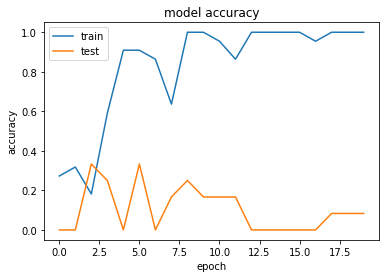

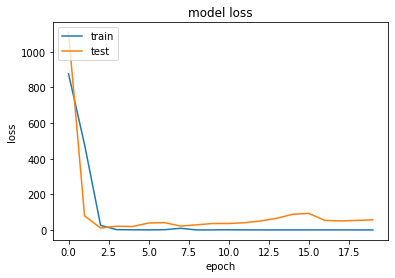

In [ ]:
history = model1.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=10, verbose=0)
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model1.save("my_model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model1 = load_model('my_model.h5')
# summarize model.
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 106, 106, 64)      51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 53, 53, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 179776)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
# load the image
#path="/content/gdrive/My Drive/dataset/data/dataset/test/images/carback.jpg"
#path="/content/gdrive/My Drive/dataset/data/dataset/img_path/IMG_20200219_125722.jpg"
image = cv2.imread(input_image)
orig = image.copy()
# pre-process the image for classification
image = cv2.resize(image, (224, 224))
image = image.astype("float") / 255.0
image = np.asarray(image, dtype="int32")
image = np.expand_dims(image, axis=0)

model1 = load_model('my_model.h5')
# classify the input image
(a)=model1.predict(image)[0]
#(Hyundai, Tata, Maruti Suzuki, Honda, Mahindra, Chevrolet, Skoda, Volkswagen, Nissan,Renault, Ford, Fiat) = model.predict(image)[0]
import operator
index, value = max(enumerate(a), key=operator.itemgetter(1))
lb= 'Hyundai','Tata','Maruti Suzuki','Honda','Mahindra','Chevrolet','Skoda','Volkswagen','Nissan','Renault','Ford','Fiat'
label=lb[index]

'''

from google.colab.patches import cv2_imshow
import imutils
# build the label
label = "car" if car > bike else "bike"
proba = car if car > bike else bike
label = "{}: {:.2f}%".format(label, proba * 100)
# draw the label on the image
output = imutils.resize(orig, width=400)
cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
	0.7, (0, 255, 0), 2)
# show the output image'''
'''
cv2.imshow("Output", output)
cv2.waitKey(0)'''

print(label)



Hyundai


In [ ]:
print("Vehicle colour:",colour)
print("Vehicle type:",label1)
print("Vehicle Manufacturer:",label)
print("License Plate no.:","MH 14 CK 1501")

Vehicle colour: red
Vehicle type: car: 95.85%
Vehicle Manufacturer: Hyundai
License Plate no.: MH 14 CK 1501
